In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
path="/Users/namh2/Downloads/anterior/ajusteTOV/"
data=np.loadtxt(path+"datos.txt")

In [3]:
RCr_data = np.array([row[1] for row in data])# galactocentric distance [kpc]
RCv_data = np.array([row[5] for row in data])# rotation velocity [km/s]
RCev_data = np.array([row[6] for row in data])# error in rotation velocity [km/s]

Text(0.5, 0, 'r[kpc]')

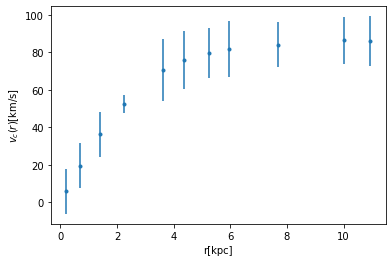

In [4]:
plt.errorbar(RCr_data,RCv_data,yerr=RCev_data,fmt='.')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")

In [5]:
#resolver la ec. de Lane-Emde
def solve(n):
    theta_values = []
    xi_values = []
    xi = 0.00001
    d_xi = 0.001
    dtheta = 0
    theta = 1
    xi_now = xi
    while (theta >= 0) and (xi_now < 30):
        xi_now = xi_now + d_xi
        dtheta_next = dtheta - (((2/xi_now)*dtheta)+theta**n)*d_xi
        theta_next = theta + dtheta_next*d_xi
        dtheta = dtheta_next
        theta  = theta_next
        theta_values.append(theta)
        xi_values.append(xi_now)
    xi_values = np.array(xi_values)
    theta_values = np.array(theta_values)
    return (xi_values, theta_values)
xi_0, theta_0 = solve(1.7)
xi_1, theta_1 = solve(1)
xi_2, theta_2 = solve(2)
xi_3, theta_3 = solve(3)
xi_4, theta_4 = solve(4)
xi_5, theta_5 = solve(5)

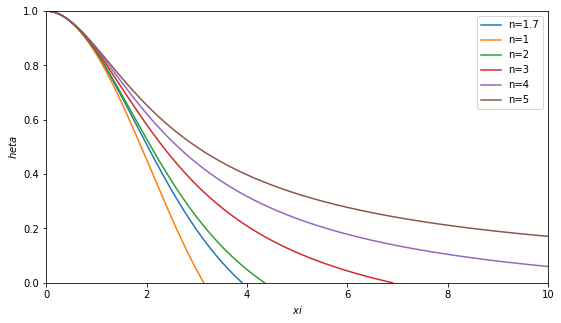

In [6]:
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(xi_0, theta_0, label = 'n=1.7')
axis.plot(xi_1, theta_1, label = 'n=1')
axis.plot(xi_2, theta_2, label = 'n=2')
axis.plot(xi_3, theta_3, label = 'n=3')
axis.plot(xi_4, theta_4, label = 'n=4')
axis.plot(xi_5, theta_5, label = 'n=5')
axis.set_ylim(0,1)
axis.set_xlim(0, 10)
axis.set_ylabel('$\theta$')
axis.set_xlabel('$xi$')
axis.legend()
plt.show()

In [7]:
int_0 = xi_0[-1]
int_1 = xi_1[-1]
int_2 = xi_2[-1]
int_3 = xi_3[-1]
int_4 = xi_4[-1]
int_5 = xi_5[-1]

print ('Values of xi at theta = 0 for various n are as follows')
print ('n=1.7:', '%.3f' %int_0)
print ('n=1:', '%.3f' %int_1)
print ('n=2:', '%.3f' %int_2)
print ('n=3:', '%.3f' %int_3)
print ('n=4:', '%.3f' %int_4)
print ('n=5: unknown, as it never crosses the x-axis')

Values of xi at theta = 0 for various n are as follows
n=1.7: 3.906
n=1: 3.141
n=2: 4.353
n=3: 6.900
n=4: 14.993
n=5: unknown, as it never crosses the x-axis


In [8]:
#Usemos el radio de la galaxia para encontrar el valor de $\alpha$
R = 3.1*10**(19)

#valores de alpha para cada n
alpha_0 = R/int_0
alpha_1 = R/int_1
alpha_2 = R/int_2
alpha_3 = R/int_3
alpha_4 = R/int_4
alpha_5 = R/int_5

In [9]:
#cada valor de r para n's
r_0 = (xi_0*alpha_0)/R
r_1 = (xi_1*alpha_1)/R
r_2 = (xi_2*alpha_2)/R
r_3 = (xi_3*alpha_3)/R
r_4 = (xi_4*alpha_4)/R
r_5 = (xi_5*alpha_5)/R
print(r_0)

[2.58575887e-04 5.14591617e-04 7.70607346e-04 ... 9.99487969e-01
 9.99743984e-01 1.00000000e+00]


In [10]:
#para halla \rho_0
def gradient(n):
    theta_values = []
    xi_values = []
    dtheta_values = []
    xi = 0.00001
    d_xi = 0.001
    dtheta = 0
    theta = 1
    xi_now = xi
    while (theta >= 0) and (xi_now < 20):
        xi_now = xi_now + d_xi
        dtheta_next = dtheta - (((2/xi_now)*dtheta)+theta**n)*d_xi
        theta_next = theta + dtheta_next*d_xi
        dtheta = dtheta_next
        theta  = theta_next
        theta_values.append(theta)
        xi_values.append(xi_now)
        dtheta_values.append(dtheta)
    xi_values = np.array(xi_values)
    theta_values = np.array(theta_values)
    dtheta_values = np.array(dtheta_values)
    return (dtheta_values)
dtheta_0 = gradient(0)
dtheta_1 = gradient(1)
dtheta_2 = gradient(2)
dtheta_3 = gradient(3)
dtheta_4 = gradient(4)
dtheta_5 = gradient(5)

In [11]:
M_s = 2*10**40
dtheta_R_0 = dtheta_0[-1]
dtheta_R_1 = dtheta_1[-1]
dtheta_R_2 = dtheta_2[-1]
dtheta_R_3 = dtheta_3[-1]
dtheta_R_4 = dtheta_4[-1]
dtheta_R_5 = dtheta_5[-1]
rho_c_0 = -M_s*int_0/(4*np.pi*R**3*dtheta_R_0)
rho_c_1 = -M_s*int_1/(4*np.pi*R**3*dtheta_R_1)
rho_c_2 = -M_s*int_2/(4*np.pi*R**3*dtheta_R_2)
rho_c_3 = -M_s*int_3/(4*np.pi*R**3*dtheta_R_3)
rho_c_4 = -M_s*int_4/(4*np.pi*R**3*dtheta_R_4)
rho_c_5 = -M_s*int_5/(4*np.pi*R**3*dtheta_R_5)
rho_0 = rho_c_0*theta_0**0
rho_1 = rho_c_1*theta_1**1
rho_2 = rho_c_2*theta_2**2
rho_3 = rho_c_3*theta_3**3
rho_4 = rho_c_4*theta_4**4
rho_5 = rho_c_5*theta_5**5
log_rho_0 = np.log10(rho_0)
log_rho_1 = np.log10(rho_1)
log_rho_2 = np.log10(rho_2)
log_rho_3 = np.log10(rho_3)
log_rho_4 = np.log10(rho_4)
log_rho_5 = np.log10(rho_5)

C:\Users\namh2\AppData\Local\Temp/ipykernel_2316/508795709.py:21: RuntimeWarning: invalid value encountered in log10
  log_rho_1 = np.log10(rho_1)
C:\Users\namh2\AppData\Local\Temp/ipykernel_2316/508795709.py:23: RuntimeWarning: invalid value encountered in log10
  log_rho_3 = np.log10(rho_3)


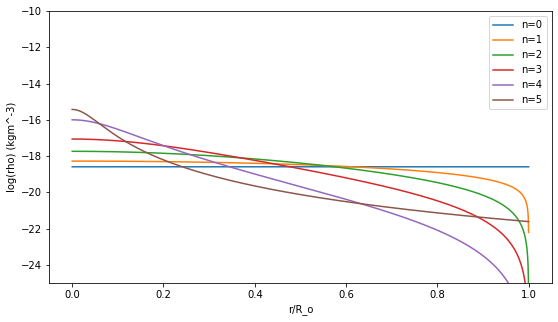

In [12]:
#densidad
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(r_0, log_rho_0, label = 'n=0')
axis.plot(r_1, log_rho_1, label = 'n=1')
axis.plot(r_2, log_rho_2, label = 'n=2')
axis.plot(r_3, log_rho_3, label = 'n=3')
axis.plot(r_4, log_rho_4, label = 'n=4')
axis.plot(r_5, log_rho_5, label = 'n=5')
axis.set_ylim(-25, -10)
axis.set_ylabel('log(rho) (kgm^-3)')
axis.set_xlabel('r/R_o')
axis.legend()
plt.show()

In [13]:
M_0=-4*np.pi*alpha_0**3*rho_c_0*xi_0**2*dtheta_0/M_s
M_1=-4*np.pi*alpha_1**3*rho_c_1*xi_1**2*dtheta_1/M_s
M_2=-4*np.pi*alpha_2**3*rho_c_2*xi_2**2*dtheta_2/M_s
M_3=-4*np.pi*alpha_3**3*rho_c_3*xi_3**2*dtheta_3/M_s
M_4=-4*np.pi*alpha_4**3*rho_c_4*xi_4**2*dtheta_4/M_s
M_5=-4*np.pi*alpha_5**3*rho_c_5*xi_5**2*dtheta_5/M_s

ValueError: operands could not be broadcast together with shapes (3906,) (2448,) 

In [ ]:
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(r_0, M_0, label = 'n=0')
axis.plot(r_1, M_1, label = 'n=1')
axis.plot(r_2, M_2, label = 'n=2')
axis.plot(r_3, M_3, label = 'n=3')
axis.plot(r_4, M_4, label = 'n=4')
axis.plot(r_5, M_5, label = 'n=5')
axis.set_ylim(0,1.0)
axis.set_ylabel('M/M_o')
axis.set_xlabel('r/R_o')
axis.legend(loc = 'lower right')
plt.show()

In [ ]:
v_0= np.sqrt(G*M_0/(alpha_0*xi_0))
v_1= np.sqrt(G*M_1/(alpha_0*xi_1))
v_2= np.sqrt(G*M_2/(alpha_0*xi_2))
v_3= np.sqrt(G*M_3/(alpha_0*xi_3))
v_4= np.sqrt(G*M_4/(alpha_0*xi_4))
v_5= np.sqrt(G*M_5/(alpha_0*xi_5))

In [ ]:
fig, axis = plt.subplots(figsize = (9,5))
axis.plot(r_0, v_0, label = 'n=0')
axis.plot(r_1, v_1, label = 'n=1')
axis.plot(r_2, v_2, label = 'n=2')
axis.plot(r_3, v_3, label = 'n=3')
axis.plot(r_4, v_4, label = 'n=4')
axis.plot(r_5, v_5, label = 'n=5')
axis.set_ylim(0,0.5)
axis.set_ylabel('v')
axis.set_xlabel('r/R_o')
axis.legend(loc = 'lower right')
plt.show()